<a href="https://colab.research.google.com/github/EdivaldoVictor/Projeto-Big-Data-Python/blob/main/Eleitorado2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Eleitorado Eleições 2022**

**Importando as Bibliotecas Necessárias para o Projeto**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Criando nosso DataFrame a partir da planilha**

In [3]:
df = pd.read_csv('drive/MyDrive/PlanilhaEleições/perfil_eleitorado_2022.csv', encoding='latin1', sep=';')

**Analisando se há colunas sem valores "Nulas"**

In [4]:
df.info
df.isnull().sum()

,0
DT_GERACAO,0
HH_GERACAO,0
ANO_ELEICAO,0
SG_UF,0
CD_MUNICIPIO,0
NM_MUNICIPIO,0
CD_MUN_SIT_BIOMETRICA,0
DS_MUN_SIT_BIOMETRICA,0
NR_ZONA,0
CD_GENERO,0


In [34]:
eleitores = list(df.QT_ELEITORES_PERFIL.unique())

#**Juntando Cidades e Estados**

In [7]:
def mescla_cidade_e_estado(n):
    return n.NM_MUNICIPIO + "-" + n.SG_UF

df.NM_MUNICIPIO = df.apply(mescla_cidade_e_estado, axis=1)

In [8]:
len(df.NM_MUNICIPIO.unique())

5751

#**Eleitores por estado**

In [11]:
eleitores_por_estado = df.groupby('SG_UF')['QT_ELEITORES_PERFIL'].sum()

eleitores_por_estado = eleitores_por_estado.sort_values(ascending=False)

**Tabela**

In [61]:
eleitores_por_estado_df = pd.DataFrame({'UF': eleitores_por_estado.index, 'Eleitores': eleitores_por_estado.values})
eleitores_por_estado_df

,UF,Eleitores
0,SP,34667793
1,MG,16290870
2,RJ,12827296
3,BA,11291528
4,RS,8593469
5,PR,8475632
6,PE,7018098
7,CE,6820673
8,PA,6082312
9,SC,5489658


#**Total de Eleitores Aptos**

In [ ]:
total_eleitores_df = pd.DataFrame({'Total de Eleitores Aptos': [eleitores_por_estado.sum()]})

**Tabela**

In [66]:
total_eleitores_df

,Total de Eleitores Aptos
0,156454011


**Gráfico**

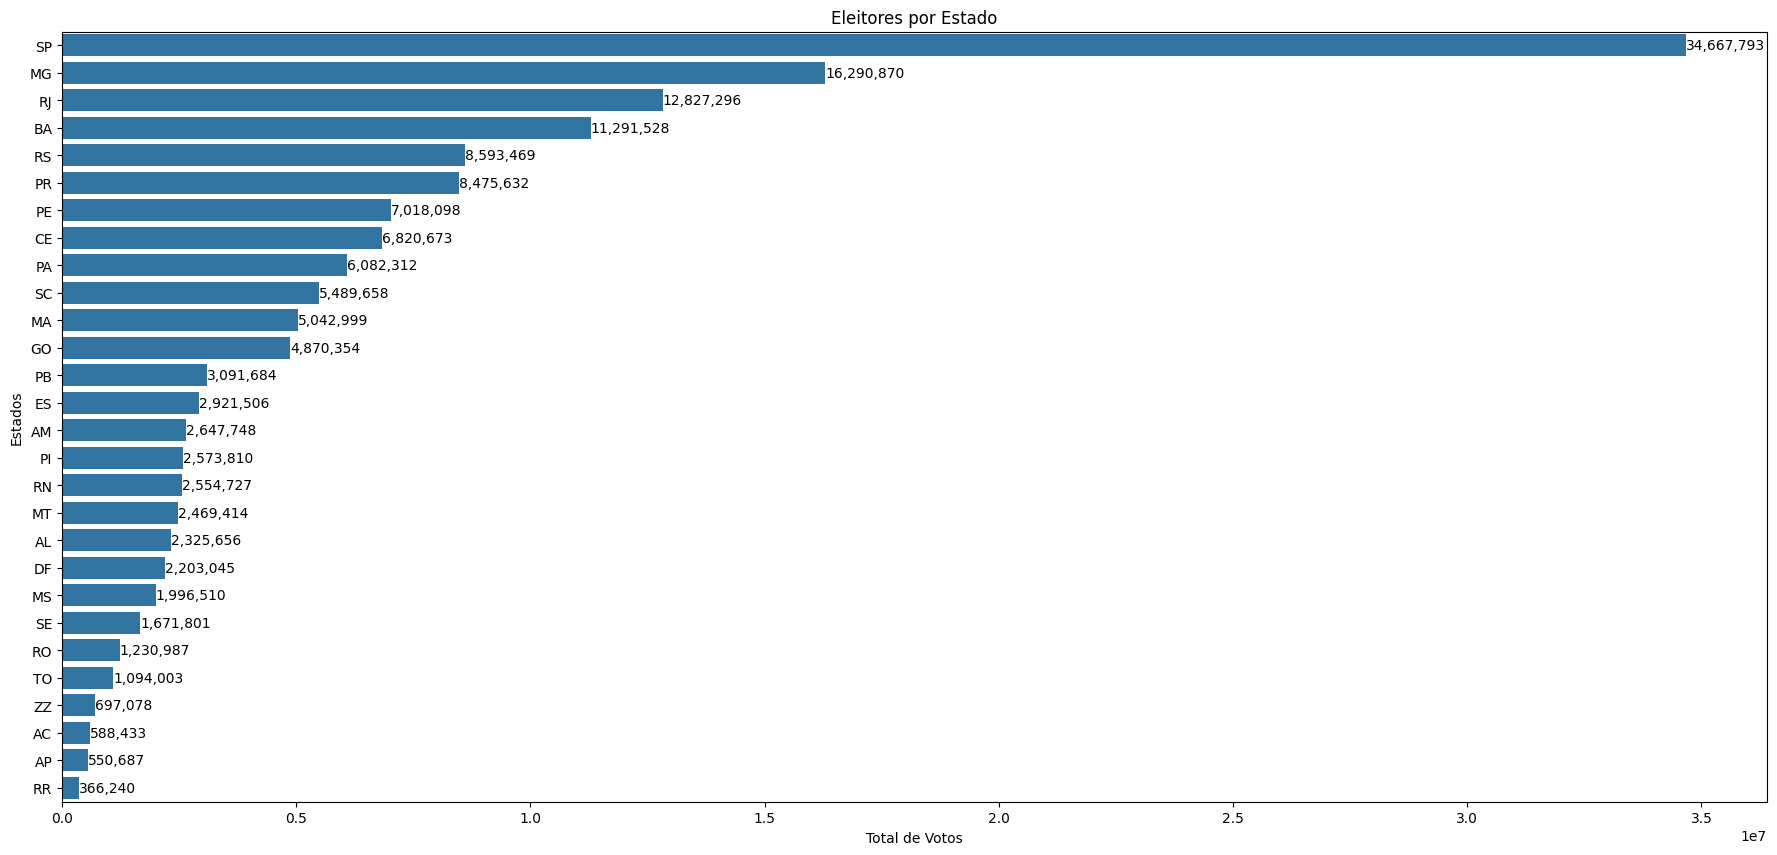

In [59]:

plt.figure(figsize=(22, 10))
sns.barplot(x=eleitores_por_estado.values, y=eleitores_por_estado.index, orient='h')
plt.xlabel('Total de Votos')
plt.ylabel('Estados')
plt.title('Eleitores por Estado')


for i, v in enumerate(eleitores_por_estado.values):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()

#**Eleitores Com Biometria**

In [209]:
eleitores_biometria_por_estado = df.groupby('SG_UF')['QT_ELEITORES_BIOMETRIA'].sum()
eleitores_biometria_por_estado = eleitores_biometria_por_estado.sort_values(ascending=False)
eleitores_biometria_df = pd.DataFrame({
    'UF': eleitores_biometria_por_estado.index,
    'Eleitores com Biometria': eleitores_biometria_por_estado.values
})


**Tabela**

In [210]:
eleitores_biometria_df

,UF,Eleitores com Biometria
0,SP,23271151
1,BA,9962524
2,MG,8375985
3,PR,7833180
4,RJ,7265152
5,RS,6678771
6,CE,6109479
7,PE,5619170
8,PA,5383420
9,GO,4511885


**Gráfico**

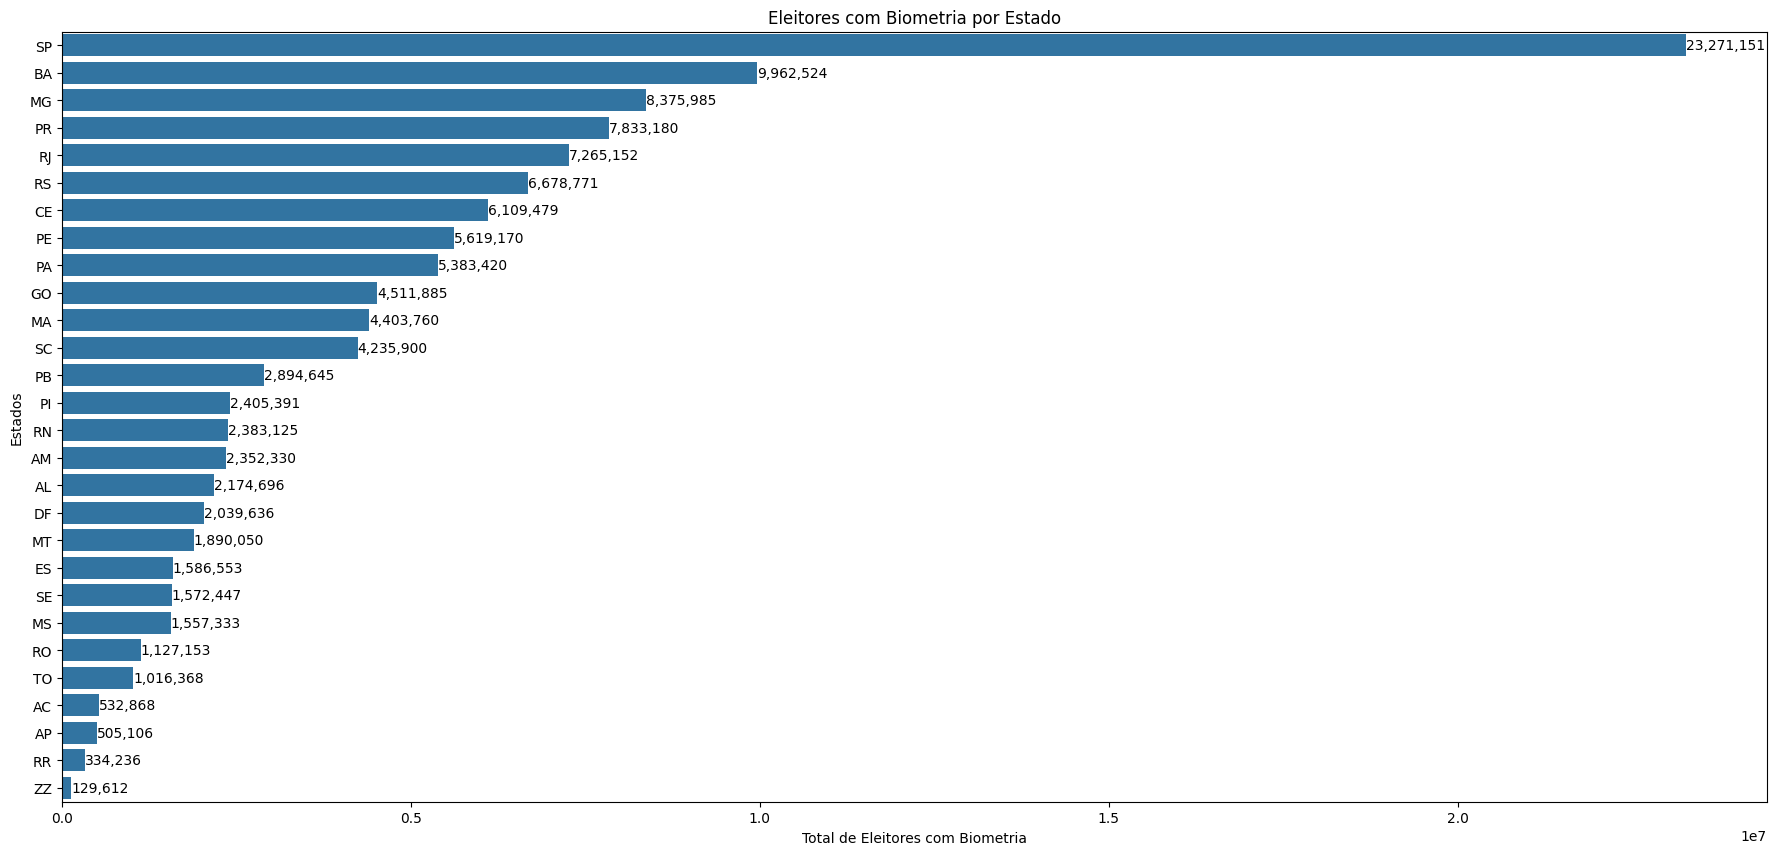

In [31]:
plt.figure(figsize=(22, 10))
sns.barplot(x='Eleitores com Biometria', y='UF', data=eleitores_biometria_df, orient='h')
plt.xlabel('Total de Eleitores com Biometria')
plt.ylabel('Estados')
plt.title('Eleitores com Biometria por Estado')

for i, v in enumerate(eleitores_biometria_df['Eleitores com Biometria']):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()

#**Eleitores Sem Biometria**

In [207]:
eleitores_sem_biometria = eleitores_por_estado - eleitores_biometria_por_estado

eleitores_sem_biometriadf = pd.DataFrame({
    'UF': eleitores_sem_biometria.index,
    'Eleitores sem Biometria': abs(eleitores_sem_biometria.values)
})

eleitores_sem_biometriadf = eleitores_sem_biometriadf.sort_values(by='Eleitores sem Biometria', ascending=False)

**Tabela**

In [208]:
eleitores_sem_biometriadf

,UF,Eleitores sem Biometria
25,SP,11396642
10,MG,7914885
18,RJ,5562144
22,RS,1914698
15,PE,1398928
7,ES,1334953
4,BA,1329004
23,SC,1253758
5,CE,711194
13,PA,698892


**Gráfico**

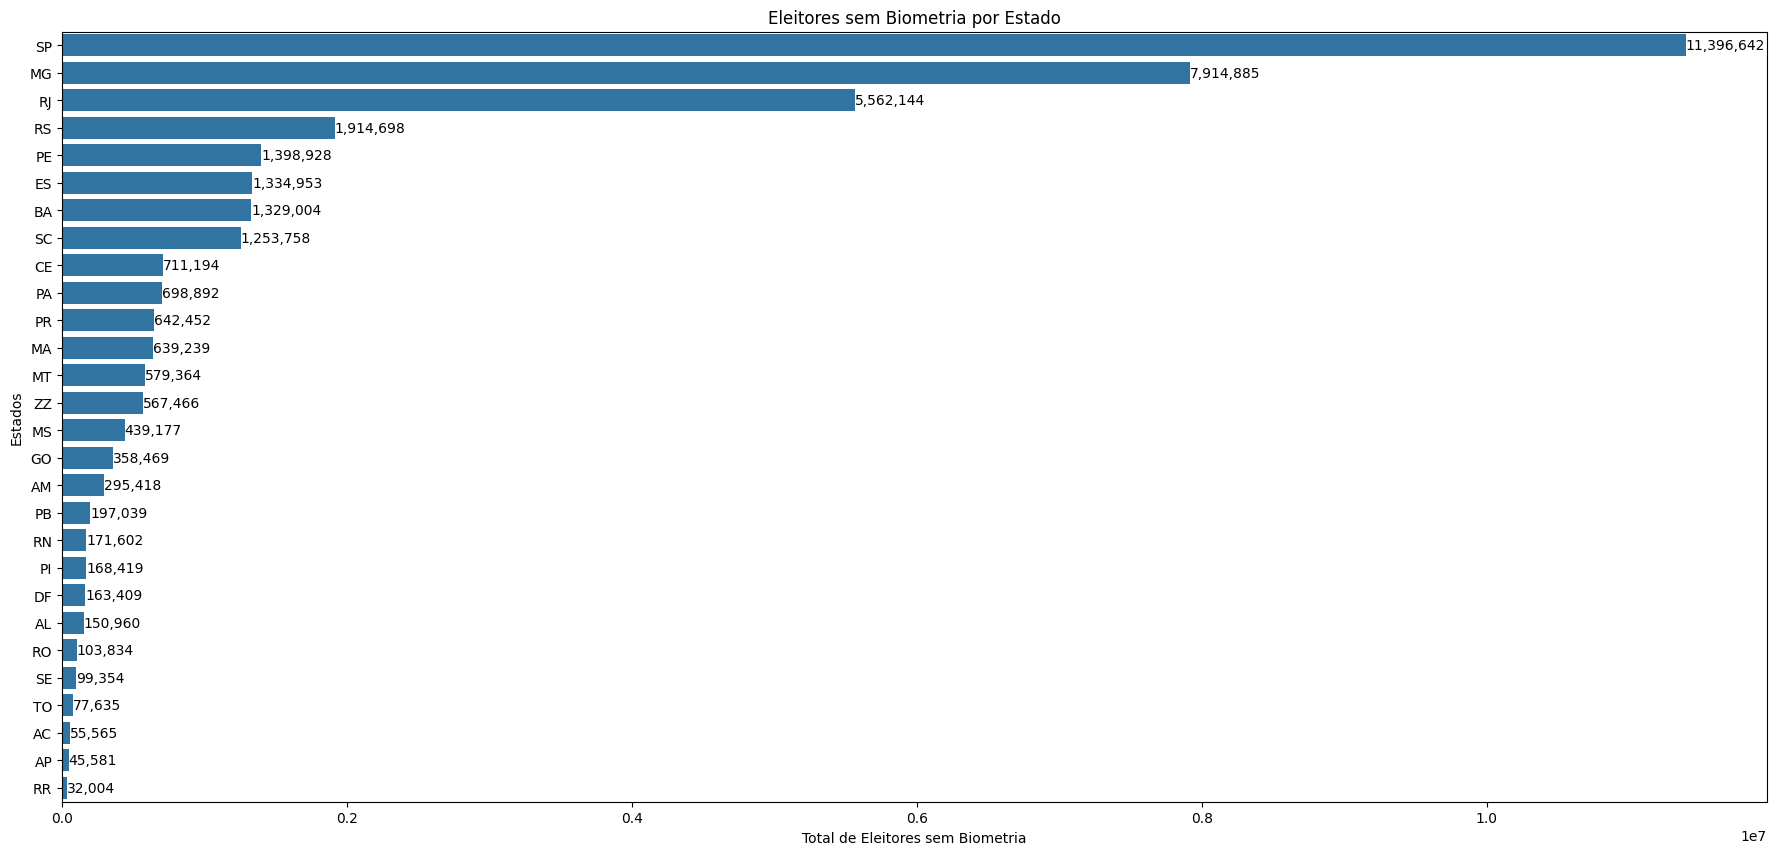

In [33]:
plt.figure(figsize=(22, 10))
sns.barplot(x='Eleitores sem Biometria', y='UF', data=eleitores_sem_biometriadf, orient='h')
plt.xlabel('Total de Eleitores sem Biometria')
plt.ylabel('Estados')
plt.title('Eleitores sem Biometria por Estado')

for i, v in enumerate(eleitores_sem_biometriadf['Eleitores sem Biometria']):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()

#**Comparando os Eleitores com e sem Biometria**

In [42]:
total_sem_biometria = eleitores_sem_biometriadf['Eleitores sem Biometria'].sum()
total_com_biometria = eleitores_biometria_df['Eleitores com Biometria'].sum()
total_eleitores = total_sem_biometria + total_com_biometria



percent_sem_biometria = (total_sem_biometria / total_eleitores) * 100
percent_com_biometria = (total_com_biometria / total_eleitores) * 100


**Tabela**

In [52]:
biometriasComp = {'Total sem Biometria': [total_sem_biometria],
        'Total com Biometria': [total_com_biometria],
        'Porcentagem sem Biometria': [f'{percent_sem_biometria:.2f}%'],
        'Porcentagem com Biometria': [f'{percent_com_biometria:.2f}%']}
biometriaSC = pd.DataFrame(biometriasComp)
biometriaSC

,Total sem Biometria,Total com Biometria,Porcentagem sem Biometria,Porcentagem com Biometria
0,38302085,118151926,24.48%,75.52%


**Gráfico**

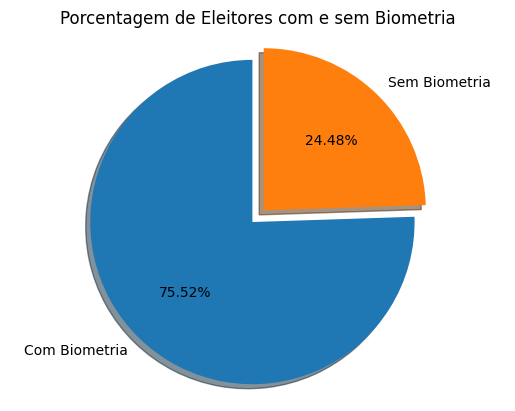

In [53]:
labels = ['Com Biometria', 'Sem Biometria']
sizes = [percent_com_biometria, percent_sem_biometria]
explode = (0.1, 0)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax.axis('equal')

plt.title('Porcentagem de Eleitores com e sem Biometria')
plt.show()

#**Eleitores Com Deficiência**

In [84]:
eleitores_deficiencia_por_estado = df.groupby('SG_UF')['QT_ELEITORES_DEFICIENCIA'].sum()
eleitores_deficiencia_por_estado = eleitores_deficiencia_por_estado.sort_values(ascending=False)
eleitores_deficiencia_df = pd.DataFrame({
    'UF': eleitores_deficiencia_por_estado.index,
    'QT_ELEITORES_DEFICIENCIA': eleitores_deficiencia_por_estado.values
})



**Tabela**

In [85]:
eleitores_deficiencia_df

,UF,QT_ELEITORES_DEFICIENCIA
0,SP,426552
1,MG,98572
2,RJ,86646
3,PR,83998
4,CE,65156
5,BA,62772
6,RS,60287
7,PA,59022
8,PE,36136
9,RN,31763


**Total de Eleitores Com Deficiência**

In [83]:
total_eleitores_deficiencia_df = pd.DataFrame({
    'Total de Eleitores com Deficiência': [eleitores_deficiencia_por_estado.sum()]
})
total_eleitores_deficiencia_df

,Total de Eleitores com Deficiência
0,1271381


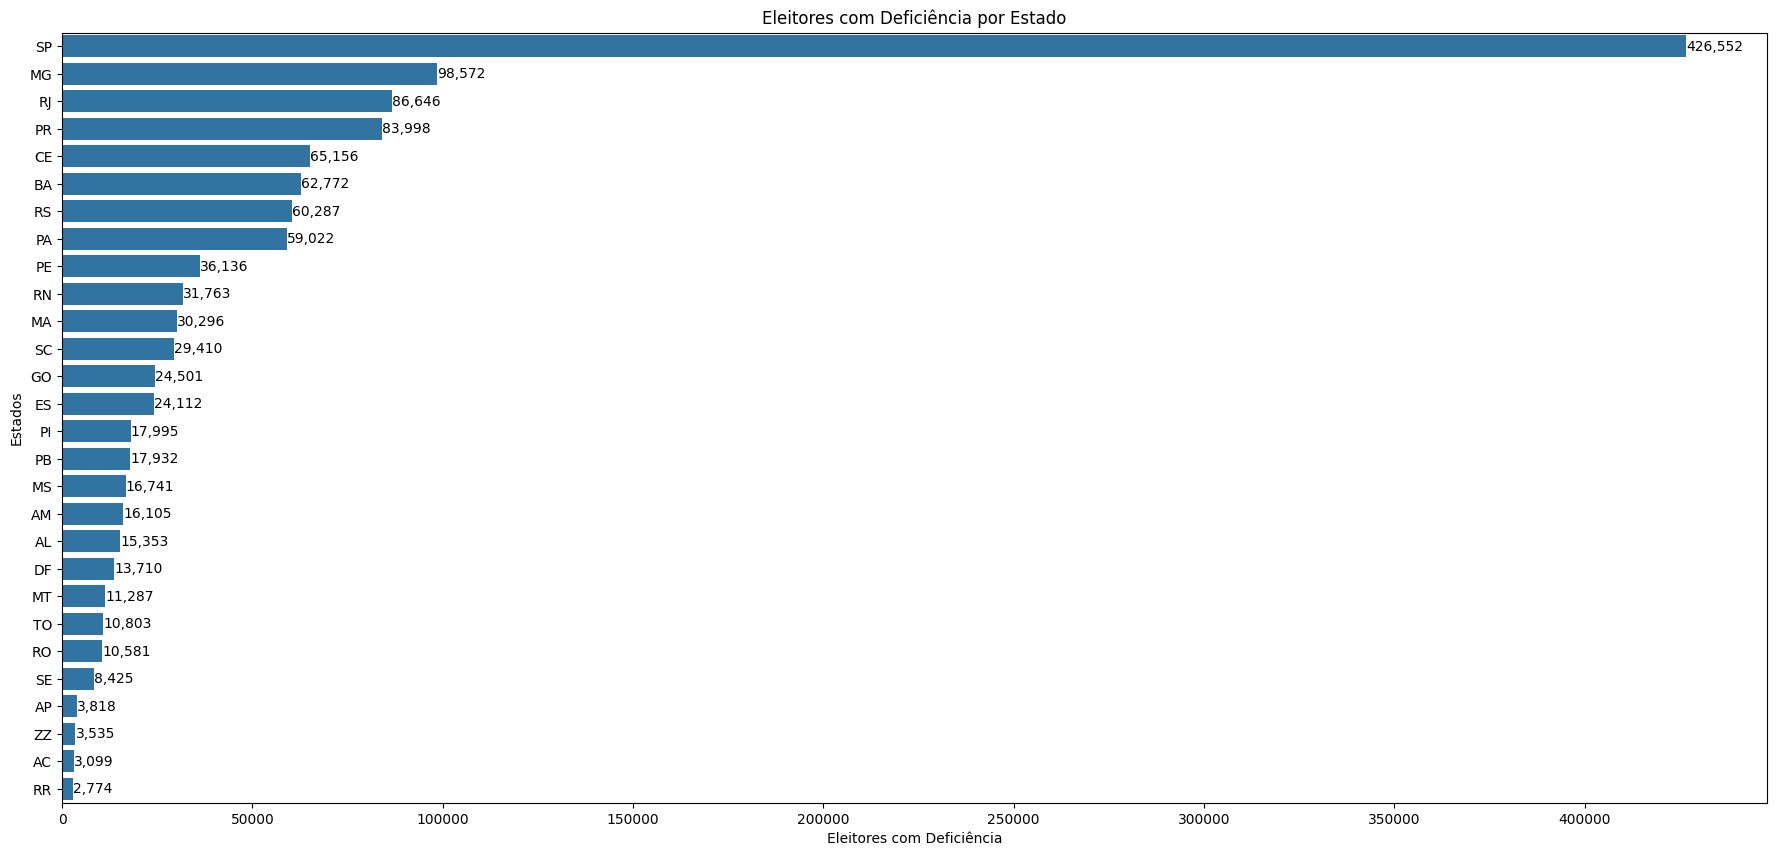

In [87]:
plt.figure(figsize=(22, 10))
sns.barplot(x='QT_ELEITORES_DEFICIENCIA', y='UF', data=eleitores_deficiencia_df, orient='h')
plt.xlabel('Eleitores com Deficiência')
plt.ylabel('Estados')
plt.title('Eleitores com Deficiência por Estado')

for i, v in enumerate(eleitores_deficiencia_df['QT_ELEITORES_DEFICIENCIA']):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()

#**Gênero dos Eleitores**

In [126]:
genero_eleitores_por_estado = df.groupby(['SG_UF', 'DS_GENERO'])['QT_ELEITORES_PERFIL'].sum().unstack()
genero_eleitores_por_estado = genero_eleitores_por_estado.fillna(0)
genero_eleitores_por_estado['Total'] = genero_eleitores_por_estado.sum(axis=1)
for genero in ['FEMININO', 'MASCULINO']:
    genero_eleitores_por_estado[genero + ' (%)'] = (genero_eleitores_por_estado[genero] / genero_eleitores_por_estado['Total']) * 100

genero_eleitores_por_estado = genero_eleitores_por_estado.round(1)


**Tabela**

In [127]:
genero_eleitores_por_estado

DS_GENERO,FEMININO,MASCULINO,NÃO INFORMADO,Total,FEMININO (%),MASCULINO (%)
SG_UF,,,,,,
AC,303832.0,284599.0,2.0,588433.0,51.6,48.4
AL,1241225.0,1084431.0,0.0,2325656.0,53.4,46.6
AM,1360842.0,1286868.0,38.0,2647748.0,51.4,48.6
AP,281700.0,268986.0,1.0,550687.0,51.2,48.8
BA,5927765.0,5363087.0,676.0,11291528.0,52.5,47.5
CE,3603756.0,3216220.0,697.0,6820673.0,52.8,47.2
DF,1191528.0,1011516.0,1.0,2203045.0,54.1,45.9
ES,1534873.0,1385794.0,839.0,2921506.0,52.5,47.4
GO,2557864.0,2312490.0,0.0,4870354.0,52.5,47.5


**Gráfico**

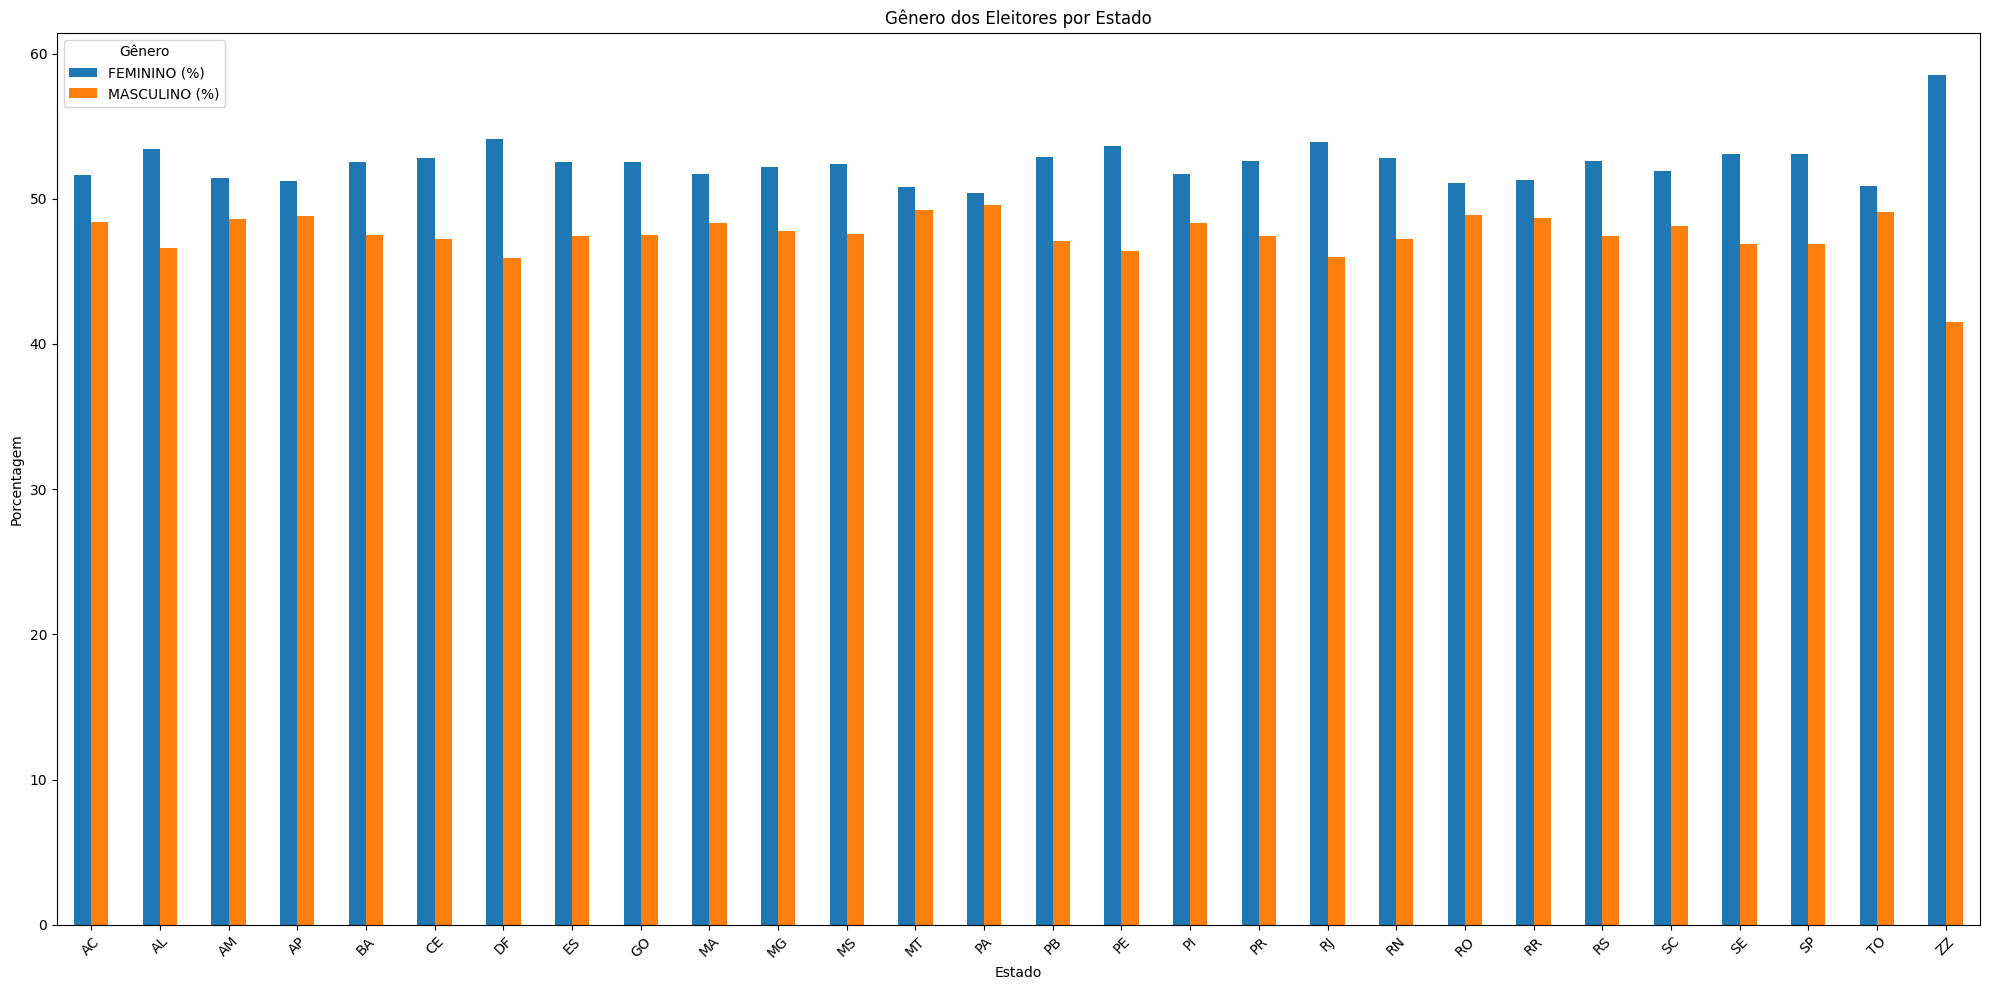

In [201]:

percentagem_colunas = [col for col in genero_eleitores_por_estado.columns if '%' in col]
plot_data = genero_eleitores_por_estado[percentagem_colunas].sort_index()

plot_data.plot(kind='bar', figsize=(20, 10))
plt.xlabel("Estado")
plt.ylabel("Porcentagem")
plt.title("Gênero dos Eleitores por Estado")
plt.xticks(rotation=45)
plt.legend(title="Gênero")

plt.tight_layout()
plt.show()

**Tabela Total gênero**

In [ ]:
contagem_genero = df[df['DS_GENERO'] != 'Não Informado'].groupby('DS_GENERO')['QT_ELEITORES_PERFIL'].sum()
Total_de_EleitoresGen = contagem_genero.sum()
Porcentagem_Genero = (contagem_genero / Total_de_EleitoresGen) * 100
Tabela_Genero = pd.DataFrame({'Total': contagem_genero, 'Percentagem': Porcentagem_Genero.round(2)})

In [128]:
Tabela_Genero

,Total,Percentagem
DS_GENERO,,
FEMININO,82373164,52.65
MASCULINO,74044065,47.33
NÃO INFORMADO,36782,0.02


**Gráfico**

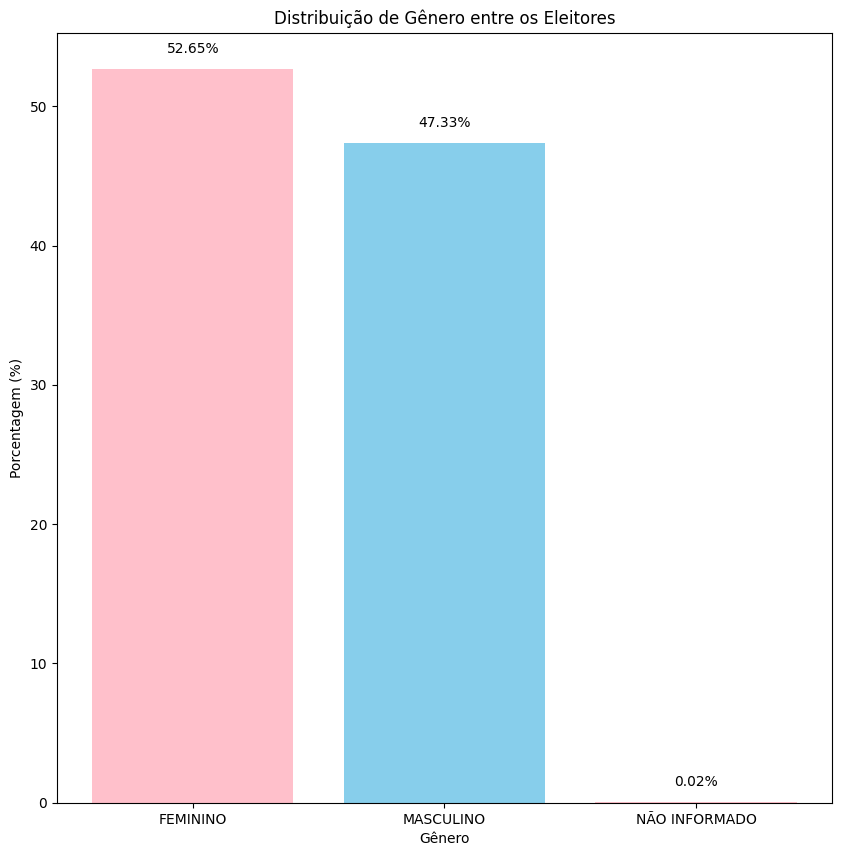

In [206]:
plt.figure(figsize=(10, 10))
plt.bar(Tabela_Genero.index, Tabela_Genero['Percentagem'], color=['pink', 'skyblue'])
plt.xlabel("Gênero")
plt.ylabel("Porcentagem (%)")
plt.title("Distribuição de Gênero entre os Eleitores")

for i, v in enumerate(Tabela_Genero['Percentagem']):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

plt.show()

#**Faixa Etária do Eleitores**

In [132]:
faixa_etaria_eleitores = df.groupby('DS_FAIXA_ETARIA')['QT_ELEITORES_PERFIL'].sum()

faixa_etaria_eleitores = faixa_etaria_eleitores.sort_values(ascending=False)

faixa_etaria_df = pd.DataFrame({'Faixa Etária': faixa_etaria_eleitores.index,
                               'Total de Eleitores': faixa_etaria_eleitores.values})

**Tabela**

In [131]:
faixa_etaria_df

,Faixa Etária,Total de Eleitores
0,35 a 39 anos,16142478
1,40 a 44 anos,16064565
2,25 a 29 anos,15943517
3,30 a 34 anos,15554999
4,45 a 49 anos,13869461
5,50 a 54 anos,12637077
6,21 a 24 anos,12321272
7,55 a 59 anos,11868255
8,60 a 64 anos,9995705
9,65 a 69 anos,8002452


**gráfico**

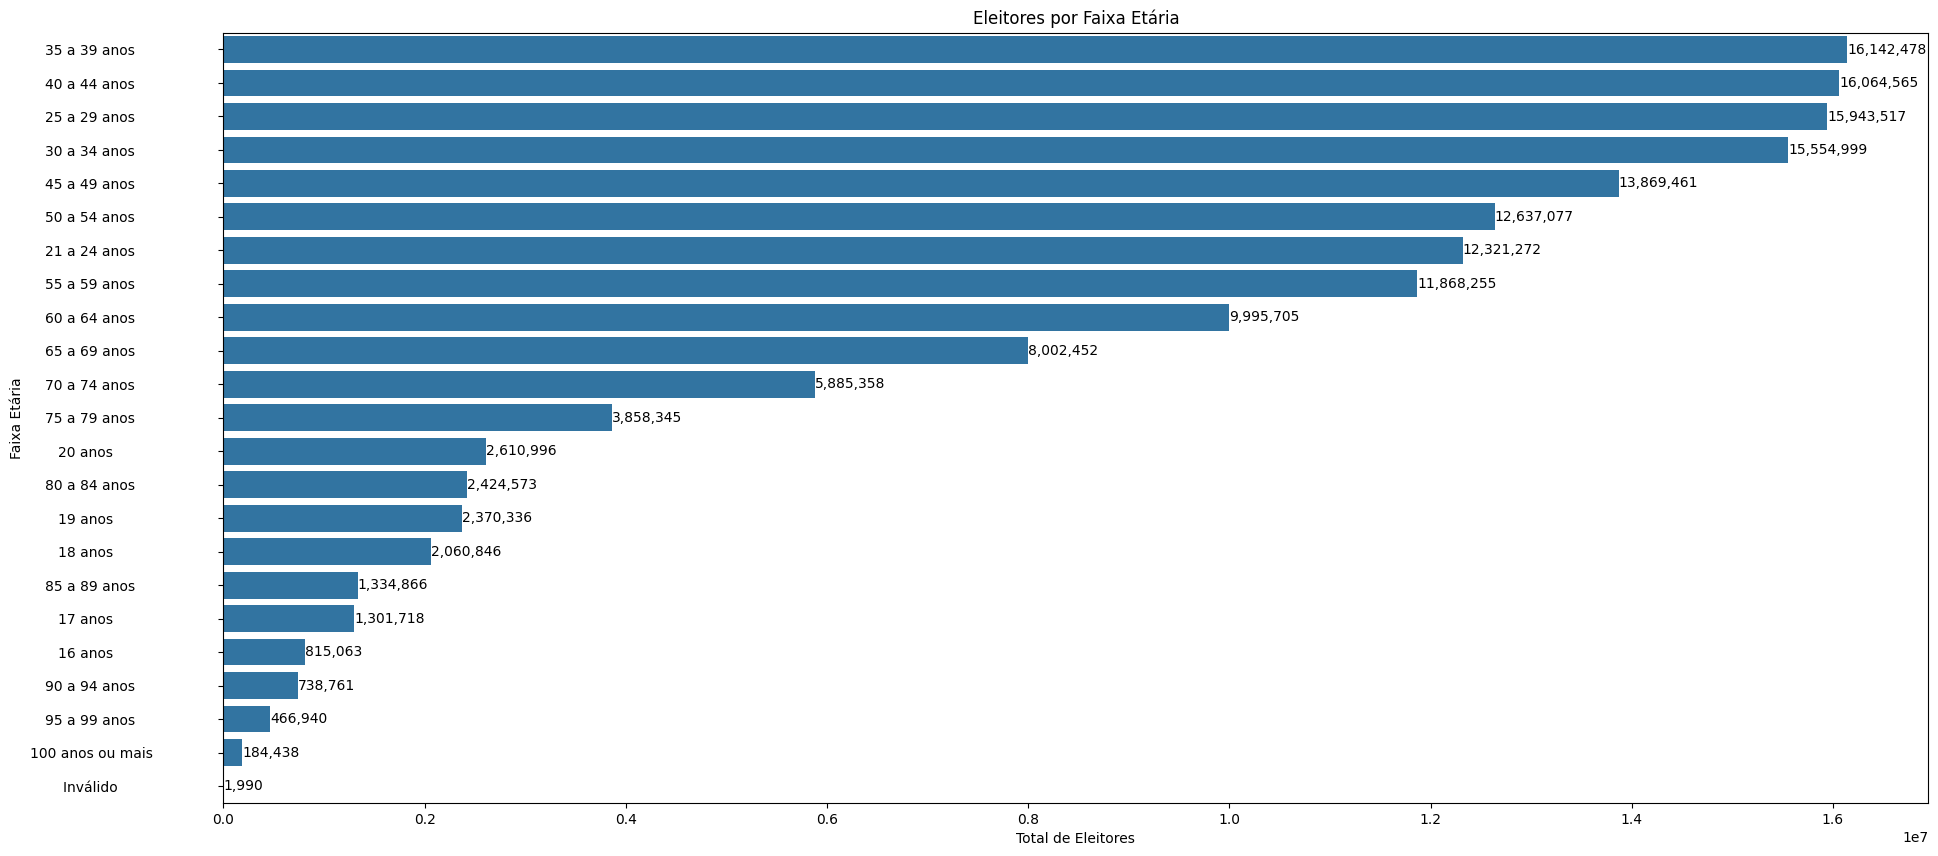

In [137]:
plt.figure(figsize=(22, 10))
sns.barplot(x='Total de Eleitores', y='Faixa Etária', data=faixa_etaria_df, orient='h')
plt.xlabel('Total de Eleitores')
plt.ylabel('Faixa Etária')
plt.title('Eleitores por Faixa Etária')

for i, v in enumerate(faixa_etaria_df['Total de Eleitores']):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()

#**Grau de Escolaridade dos Eleitores**

In [188]:
escolaridade_eleitores = df.groupby('DS_GRAU_ESCOLARIDADE')['QT_ELEITORES_PERFIL'].sum()
escolaridade_eleitores = escolaridade_eleitores.sort_values(ascending=False)

total_eleitores_escolaridade = escolaridade_eleitores.sum()
porcentagem_escolaridade = (escolaridade_eleitores / total_eleitores_escolaridade) * 100

tabela_escolaridade = pd.DataFrame({
    'Total de Eleitores': escolaridade_eleitores,
    'Porcentagem': porcentagem_escolaridade.round(2)
})

tabela_escolaridade['Porcentagem'] = tabela_escolaridade['Porcentagem'].astype(str) + '%'


**Tabela**

In [189]:
tabela_escolaridade

,Total de Eleitores,Porcentagem
DS_GRAU_ESCOLARIDADE,,
ENSINO MÉDIO COMPLETO,41161552,26.31%
ENSINO FUNDAMENTAL INCOMPLETO,35930401,22.97%
ENSINO MÉDIO INCOMPLETO,26049309,16.65%
SUPERIOR COMPLETO,17127128,10.95%
LÊ E ESCREVE,11206893,7.16%
ENSINO FUNDAMENTAL COMPLETO,10197034,6.52%
SUPERIOR INCOMPLETO,8409644,5.38%
ANALFABETO,6339894,4.05%
NÃO INFORMADO,32156,0.02%


**Gráfico**

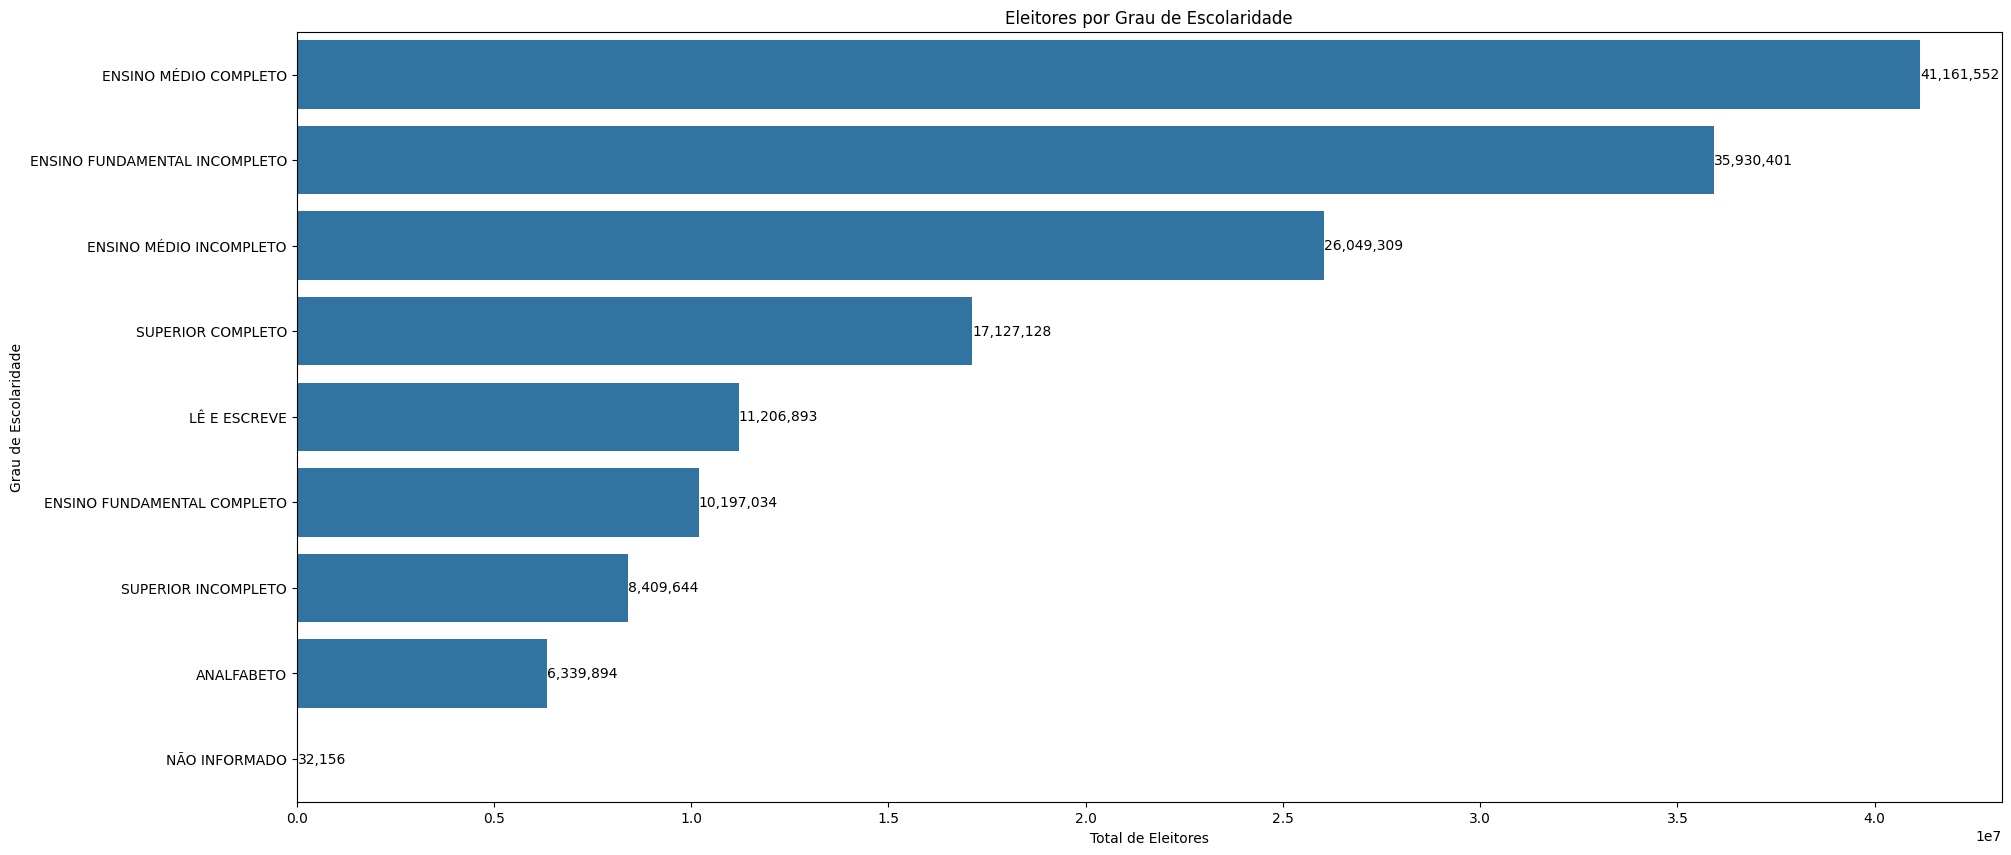

In [200]:
plt.figure(figsize=(22, 10))
sns.barplot(x='Total de Eleitores', y=tabela_escolaridade.index, data=tabela_escolaridade, orient='h')
plt.xlabel('Total de Eleitores')
plt.ylabel('Grau de Escolaridade')
plt.title('Eleitores por Grau de Escolaridade')

for i, v in enumerate(tabela_escolaridade['Total de Eleitores']):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()
